## Import lib

In [1]:
import csv
import matplotlib.pyplot as plt
from numpy import loadtxt

### Import all files

triangle - 200 episodes

In [2]:
multiple_service_reward_file_path = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/sample_agent_100_DDPG_Baseline_one_service_flow_objective/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/sfc_requirement_3_services/2021-07-04_21-23-17_seed9726/monitor.csv'

In [3]:
trained_200_multiple_service_drop_request = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/sample_agent_100_DDPG_Baseline_one_service_flow_objective/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/sfc_requirement_3_services/2021-07-04_21-23-17_seed9726/test-2021-07-04_21-23-17_seed9726/metrics.csv'
trained_200_multiple_service_total_request = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/sample_agent_100_DDPG_Baseline_one_service_flow_objective/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/sfc_requirement_3_services/2021-07-04_21-23-17_seed9726/test-2021-07-04_21-23-17_seed9726/metrics.csv'
balance_multiple_service_drop_request = '/home/dat/git_folder_edge_4/realVNF/baseline-algorithms/results/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/2021-07-05_10-19-42_seed8043_balance/metrics.csv'
balance_multiple_service_total_request = '/home/dat/git_folder_edge_4/realVNF/baseline-algorithms/results/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/2021-07-05_10-19-42_seed8043_balance/metrics.csv'
shortest_multiple_service_drop_request = '/home/dat/git_folder_edge_4/realVNF/baseline-algorithms/results/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/2021-07-05_10-20-33_seed261_shortest/metrics.csv'
shortest_multiple_service_total_request = '/home/dat/git_folder_edge_4/realVNF/baseline-algorithms/results/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/2021-07-05_10-20-33_seed261_shortest/metrics.csv'
random_multiple_service_drop_request = '/home/dat/git_folder_edge_4/realVNF/baseline-algorithms/results/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/2021-07-05_10-20-09_seed8883_random/metrics.csv'
random_multiple_service_total_request = '/home/dat/git_folder_edge_4/realVNF/baseline-algorithms/results/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/2021-07-05_10-20-09_seed8883_random/metrics.csv'

### Functions for processing

To read to list

In [4]:
def read_csv_to_list(file_path, index_start_reading, colum_number):
    return_array = list()
    with open(file_path, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for index, row in enumerate(spamreader):
            if index >= index_start_reading:
                return_array.append(float(row[colum_number]))
    return return_array

Calculate drop/succ rate 

In [5]:
def calculate_drop_succ_rate(drop_arr, succ_arr):
    rate_arr = [drop_arr[i]/(drop_arr[i] + succ_arr[i]) for i in range(len(drop_arr))]
    return rate_arr

In [6]:
def calculate_drop_total_rate(drop_arr, total_arr):
    rate_arr = list()
    for i in range(len(drop_arr)):
        if total_arr[i] > 0: 
            rate_arr.append(drop_arr[i]/total_arr[i])
        else: 
            rate_arr.append(0)
    return rate_arr

In [29]:
def calculate_drop_succ_rate_all(drop_arr_search, drop_arr_shop, drop_arr_web, total_arr_search, total_arr_shop, total_arr_web):
    rate_arr = [(drop_arr_search[i] + drop_arr_shop[i] + drop_arr_web[i])/(total_arr_search[i] + total_arr_shop[i] + total_arr_web[i]) for i in range(len(drop_arr_search))]
    return rate_arr

Filter for abnormal value

In [30]:
def filter_abnormal_values(array, value):
    return [i for i in array if i < value]

Ingress normalize

In [31]:
def ingress_traffic_calculation(ingress_arr):
    return [i*500 for i in ingress_arr]

In [32]:
def calculate_mean(arr):
    return sum(arr)/len(arr)

get real array

In [33]:
def extract_real_request(arr):
    return [arr[i+1] - arr[i] for i in range(len(arr)) if i < len(arr) - 1]

In [34]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

### Read files to variables


In [37]:
run_reward = list()
drop_request = list()
norm_ingress_traffic = list()
latency = list()
succ_request = list()
total_request = list()
drop_succ_rate = list()
runtime = list()
agent_time = list()
runtime_filtered = list()
agent_time_filtered = list()
ingress_traffic = list()


search_drop_request = list()
shop_drop_request = list()
web_drop_request = list()
all_drop_request = list()

search_total_request = list()
shop_total_request = list()
web_total_request = list()
all_total_request = list()

search_drop_total_rate = list()
shop_drop_total_rate = list()
web_drop_total_rate = list()
all_drop_total_rate = list()


drop_total_rate_all = list()

algos = ['trained_200', 'random', 'shortest', 'balance']
topology = "multiple_service"
services = ['all', 'search', 'shop', 'web']
reward_sim = read_csv_to_list(eval(f"{topology}_reward_file_path"), 2, 0)
for ind, algo in enumerate(algos):
    for service_ind, service in enumerate(services):
        eval(f"{service}_drop_request").append(extract_real_request(read_csv_to_list(eval(f"{algo}_{topology}_drop_request"), 1, (11 + service_ind))))
        eval(f"{service}_total_request").append(extract_real_request(read_csv_to_list(eval(f"{algo}_{topology}_total_request"), 1, (2 + service_ind))))
        eval(f"{service}_drop_total_rate").append(calculate_drop_total_rate(eval(f"{service}_drop_request[{ind}]"), eval(f"{service}_total_request[{ind}]")))
    drop_total_rate_all.append(calculate_drop_succ_rate_all(eval(f"search_drop_request[{ind}]"), eval(f"shop_drop_request[{ind}]"), eval(f"web_drop_request[{ind}]"), eval(f"search_total_request[{ind}]"), eval(f"shop_total_request[{ind}]"), eval(f"web_total_request[{ind}]")))

In [45]:
average_point_total = dict()
average_point = list()
for ind, algo in enumerate(algos):
    if algo == "random":
        continue
    average_point = list()
    average_point.append(calculate_mean(drop_total_rate_all[ind]))
    average_point.append(calculate_mean(search_drop_total_rate[ind]))
    average_point.append(calculate_mean(shop_drop_total_rate[ind]))
    average_point.append(calculate_mean(web_drop_total_rate[ind]))
    average_point_total[algo] = average_point
average_point_total


{'trained_200': [0.3092272653734954,
  0.1499540933040425,
  0.36674941153333857,
  0.3897632756677612],
 'shortest': [0.5850771936859959,
  0.5821277896919921,
  0.5825836587936268,
  0.5858435127066279],
 'balance': [0.3423092217767187,
  0.3448738152255453,
  0.3472419309521016,
  0.3366907109717363]}

### Draw latency graph through time after each case

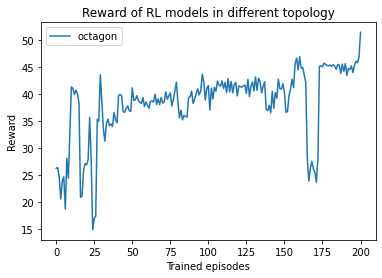

In [46]:
plt.plot(reward_sim, label="octagon")
plt.title("Reward of RL models in different topology")
plt.xlabel("Trained episodes")
plt.ylabel("Reward")
plt.legend()
plt.show()

### Algoprithm compare

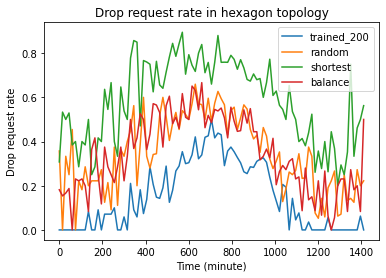

In [47]:
x_range = [i * 15 for i in range(len(search_drop_total_rate[0]))]

for index, algo in enumerate(algos):
    plt.plot(x_range, search_drop_total_rate[index], label=f'{algo}')

plt.title("Drop request rate in hexagon topology")
plt.xlabel("Time (minute)")
plt.ylabel("Drop request rate")
plt.legend()
plt.show()

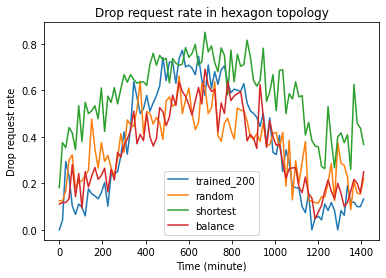

In [48]:
x_range = [i * 15 for i in range(len(search_drop_total_rate[0]))]

for index, algo in enumerate(algos):
    plt.plot(x_range, shop_drop_total_rate[index], label=f'{algo}')

plt.title("Drop request rate in hexagon topology")
plt.xlabel("Time (minute)")
plt.ylabel("Drop request rate")
plt.legend()
plt.show()

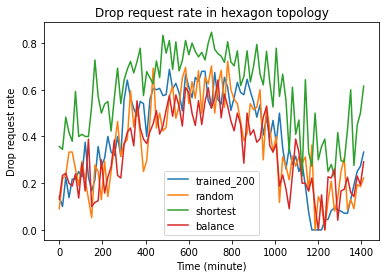

In [49]:
x_range = [i * 15 for i in range(len(search_drop_total_rate[0]))]

for index, algo in enumerate(algos):
    plt.plot(x_range, web_drop_total_rate[index], label=f'{algo}')

plt.title("Drop request rate in hexagon topology")
plt.xlabel("Time (minute)")
plt.ylabel("Drop request rate")
plt.legend()
plt.show()

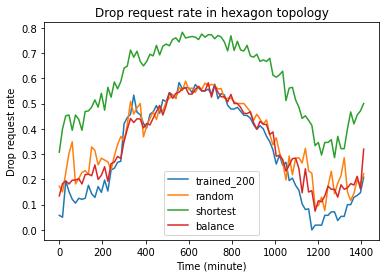

In [50]:
x_range = [i * 15 for i in range(len(search_drop_total_rate[0]))]

for index, algo in enumerate(algos):
    plt.plot(x_range, all_drop_total_rate[index], label=f'{algo}')

plt.title("Drop request rate in hexagon topology")
plt.xlabel("Time (minute)")
plt.ylabel("Drop request rate")
plt.legend()
plt.show()

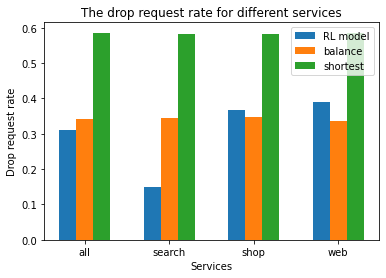

In [51]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = services
average_point_total
  
X_axis = np.arange(len(X))
# for ind, algo in enumerate(algos):
#     if algo == "random":
#         continue
plt.bar(X_axis - 0.2, average_point_total["trained_200"], 0.2, label = 'RL model')
plt.bar(X_axis, average_point_total["balance"], 0.2, label = 'balance')
plt.bar(X_axis + 0.2, average_point_total["shortest"], 0.2, label = 'shortest')
# plt.bar(X_axis + 0.3, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Services")
plt.ylabel("Drop request rate")
plt.title("The drop request rate for different services")
plt.legend()
plt.show()